<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/Exercise_2.24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Exercise 2.24

Name: JM

Date: December 2020

Pharmacokinetics is the study of how drugs infused to the body are distributed to other parts of the body. The concept of compartmental model is often used, where it is assumed that the drug is injured into compartment 1. Some of the drug is eliminated (reacted) in compartment 1, and some of it diffuses into compartment 2 (the rest accumulates in compartment 1). Similarly, some of the drug that diffuses into compartment 2 diffuses back into compartment 1, while some is eliminated by reaction and the rest accumulates in compartment 2. Assume that the rates of diffusion and reaction are directly proportional to the concentration of drug in the compartment of interest. Show that the following balance equations arise, and discuss the meaning of each parameter ($k_{ij}$, unist of $min^{-1}$)

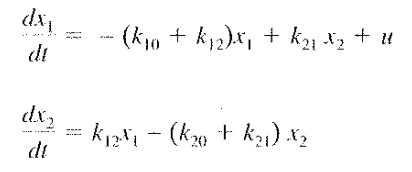

To explain the above model we only need to draw the diagram representing the process. 

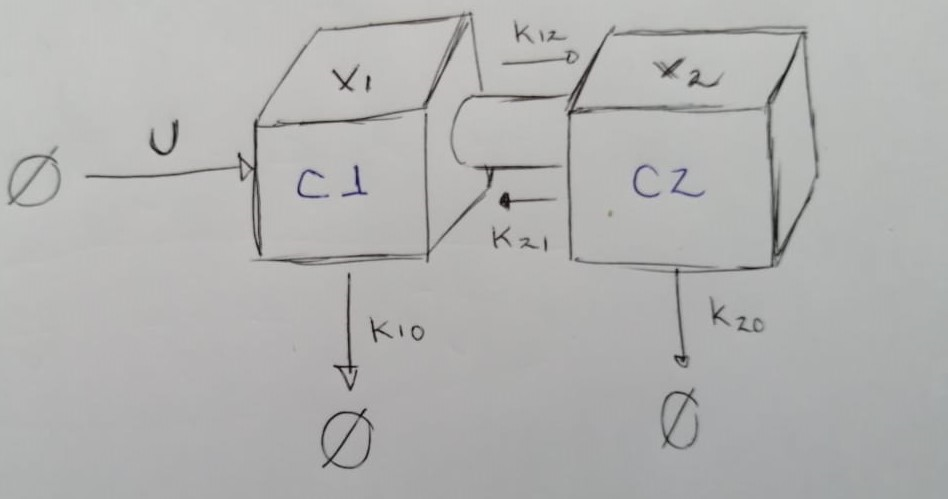

The meaning of each parameters is as follows

u --> it represents the input to the system, the amount of x1 that is supplied (gmol/L*min)

k10 --> the reaction rate constant of x1 (1/min)

k12 --> the diffusion rate constant of x1, that is, the rate at which x1 go from compartment 1 to compartment 2 (1/min)

k21 --> the same that k12 but for x2 (1/min)

k20 --> the same that k10 but for x2 (1/min)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [2]:
# establish model
def model(s,t,p,u):

  # state variables
  x1 = s[0]
  x2 = s[1]

  # parameters
  k10 = p[0]
  k12 = p[1]
  k21 = p[2]
  k20 = p[3]

  # inputs
  # u 

  # material balance
  dx1dt = -(k10 + k12)*x1 + k21*x2 + u
  dx2dt = k12*x1 - (k20 + k21)*x2

  return [dx1dt,dx2dt]

In [3]:
# establish parameter values
k10 = 0.1
k12 = 0.4
k21 = 0.3
k20 = 0.05
p = [k10,k12,k21,k20]

In [4]:
# establish initial conditions 
x10 = 0
x20 = 0
s = [x10, x20]

In [12]:
# integration time
t = np.linspace(0,100,100)

In [13]:
# establish input value
u = 1

In [14]:
# solve ODEs
out = odeint(model,s,t,args=(p,u))

In [15]:
# save results
x1 = out[:, 0]
x2 = out[:,1]

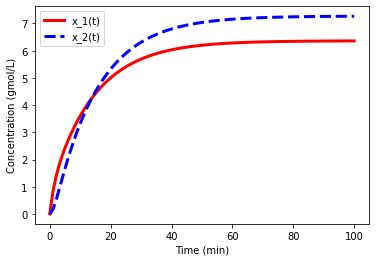

In [16]:
plt.plot(t,x1,"r-",linewidth = 3, label = "x_1(t)")
plt.plot(t,x2,"b--",linewidth = 3, label = "x_2(t)")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (gmol/L)")
plt.legend(loc="best")

In [17]:
# change input
u = np.ones(len(t))
u[50:75] = 2

In [18]:
# vactor to save state
x1 = np.ones(len(t))*x10
x2 = np.ones(len(t))*x20

In [19]:
# cicle for update input
for i in range(len(t)-1):
  # update time span
  ts = [t[i],t[i+1]]
  # solve ODEs
  out = odeint(model,s,ts,args=(p,u[i+1]))
  # save sate
  x1[i+1] = out[-1][0]
  x2[i+1] = out[-1][1]
  # update initial conditons
  s = out[-1]

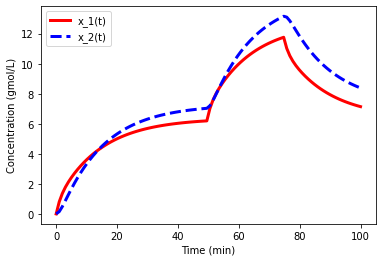

In [20]:
plt.plot(t,x1,"r-",linewidth = 3, label = "x_1(t)")
plt.plot(t,x2,"b--",linewidth = 3, label = "x_2(t)")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (gmol/L)")
plt.legend(loc="best")